# NewsClassifier: Building an Automated News Classification System with NLP Techniques

# Import Libraries

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
import re 
import string
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vijiv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vijiv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vijiv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Import Dataset

In [50]:
data=pd.read_csv(r"C:\Users\vijiv\OneDrive\Desktop\news dataset\BBC news\Train.csv")

In [51]:
data

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


# shape of Dataset

In [52]:
data.shape

(1490, 3)

# Information of Data

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [54]:
data['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

# Convert Categories into Numerical Values

In [56]:
target_category = data['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


In [57]:
data['CategoryId'] = data['Category'].factorize()[0] #for random shuffling
data.head()

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


In [58]:
category = data[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

,Category,CategoryId
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


# Exploratory Data Analysis (EDA)

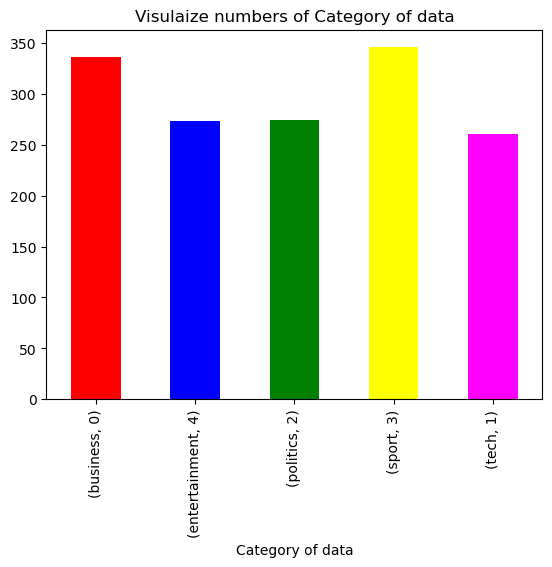

In [59]:
data.groupby('Category').CategoryId.value_counts().plot(kind = "bar",color = ["red", "blue", "green", "yellow", "magenta"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

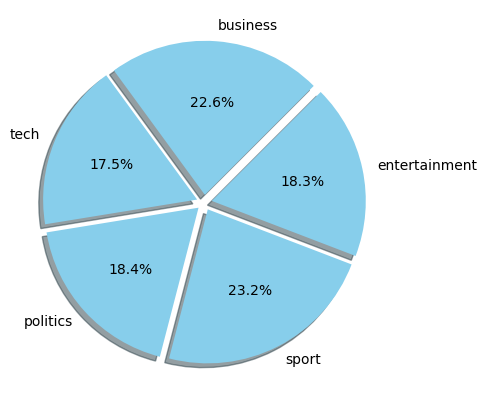

In [12]:
fig = plt.figure(figsize = (5,5))
colors = ["skyblue"]
business = data[data['CategoryId'] == 0 ]
tech = data[data['CategoryId'] == 1 ]
politics = data[data['CategoryId'] == 2]
sport = data[data['CategoryId'] == 3]
entertainment = data[data['CategoryId'] == 4]
count = [business['CategoryId'].count(), tech['CategoryId'].count(), politics['CategoryId'].count(), sport['CategoryId'].count(), entertainment['CategoryId'].count()]
pie = plt.pie(count, labels = ['business', 'tech', 'politics', 'sport', 'entertainment'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05))

# word cloud

In [13]:
from wordcloud import WordCloud

In [14]:
stop=set(stopwords.words('english'))
business=data[data['CategoryId']==0]
business=business['Text']
tech=data[data['CategoryId']==1]
tech=tech['Text']
politics=data[data['CategoryId']==2]
politics=politics['Text']
sports=data[data['CategoryId']==3]
sports=sports['Text']
entertainment=data[data['CategoryId']==4]
entertainment=entertainment['Text']

In [15]:
def wordcloud_draw(data,color):
    words=" ".join(data)
    cleaned_words=' '.join([word for word in words.split()
                           if(word!='news' and word !='text')])
    wordCloud=WordCloud(stopwords=stop,background_color=color,
                        width=2000,height=2000).generate(cleaned_words)
    plt.figure(1,figsize=(5,8))
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.show()
    

# business related words

business related words:


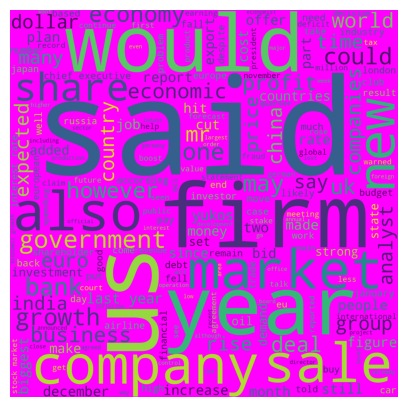

In [206]:
print("business related words:")
wordcloud_draw(business,'magenta')

tech related words:


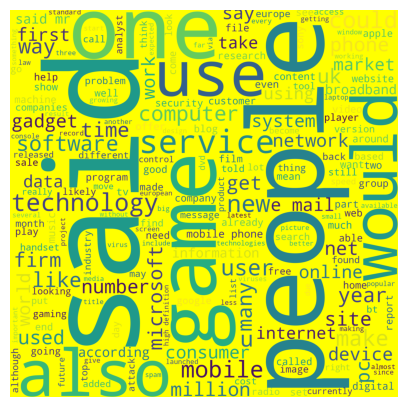

In [16]:
print("tech related words:")
wordcloud_draw(tech,'yellow')

politics related words:


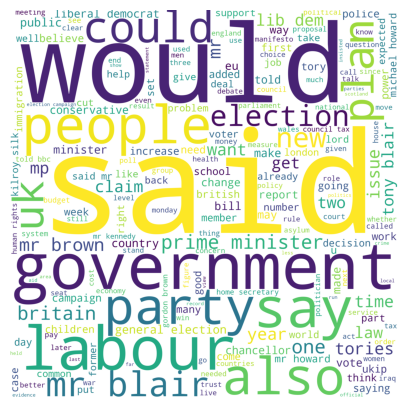

In [17]:
print("politics related words:")
wordcloud_draw(politics,'white')

sports related words:


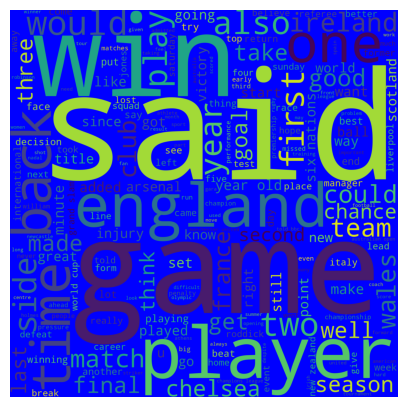

In [18]:
print("sports related words:")
wordcloud_draw(sports,'blue')

entertainment related words:


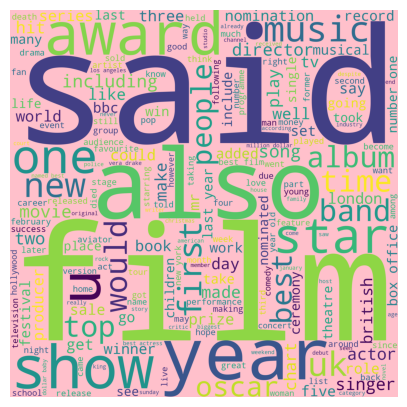

In [19]:
print("entertainment related words:")
wordcloud_draw(entertainment,'pink')

In [21]:
text = data["Text"]
text.head(10)

0    worldcom ex-boss launches defence lawyers defe...
1    german business confidence slides german busin...
2    bbc poll indicates economic gloom citizens in ...
3    lifestyle  governs mobile choice  faster  bett...
4    enron bosses in $168m payout eighteen former e...
5    howard  truanted to play snooker  conservative...
6    wales silent on grand slam talk rhys williams ...
7    french honour for director parker british film...
8    car giant hit by mercedes slump a slump in pro...
9    fockers fuel festive film chart comedy meet th...
Name: Text, dtype: object

In [23]:
category = data['Category']
category.head(10)

0         business
1         business
2         business
3             tech
4         business
5         politics
6            sport
7    entertainment
8         business
9    entertainment
Name: Category, dtype: object

# Removing Special Characters

In [24]:
def wordopt(text):
    text=text.lower()
    text=re.sub('\[.*?\]',"",text)
    text=re.sub('http?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    text = re.sub('[^a-zA-Z]', '', str(text))
    return text

In [37]:
data['Text']=data['Text'].apply(wordopt)


In [38]:
data['Text']

0       worldcomexbosslaunchesdefencelawyersdefendingf...
1       germanbusinessconfidenceslidesgermanbusinessco...
2       bbcpollindicateseconomicgloomcitizensinamajori...
3       lifestylegovernsmobilechoicefasterbetterorfunk...
4       enronbossesinpayouteighteenformerenrondirector...
                              ...                        
1485    doubleevictionfrombigbrothermodelcapriceandhol...
1486    djdoubleactrevampchartshowdjduojkandjoelaretak...
1487    weakdollarhitsreutersrevenuesatmediagroupreute...
1488    appleipodfamilyexpandsmarketapplehasexpandedit...
1489    santywormmakesunwelcomevisitthousandsofwebsite...
Name: Text, Length: 1490, dtype: object

# Remove all Stopwords

In [39]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]
data['Text'] = data['Text'].apply(remove_stopwords)
data['Text'][1]

['germanbusinessconfidenceslidesgermanbusinessconfidencefellinfebruaryknockinghopesofaspeedyrecoveryineuropeslargesteconomymunichbasedresearchinstituteifosaidthatitsconfidenceindexfelltoinfebruaryfrominjanuaryitsfirstdeclineinthreemonthsthestudyfoundthattheoutlookinboththemanufacturingandretailsectorshadworsenedobservershadbeenhopingthatamoreconfidentbusinesssectorwouldsignalthateconomicactivitywaspickingupweresurprisedthattheifoindexhastakensuchaknocksaiddzbankeconomistberndweidensteinerthemainreasonisprobablythatthedomesticeconomyisstillweakparticularlyintheretailtradeeconomyandlabourministerwolfgangclementcalledthedipinfebruarysifoconfidencefigureaverymilddeclinehesaidthatdespitetheretreattheindexremainedatarelativelyhighlevelandthatheexpectedamodesteconomicupswingtocontinuegermanyseconomygrewlastyearaftershrinkinginhowevertheeconomycontractedbyduringthelastthreemonthsofmainlyduetothereluctanceofconsumerstospendlatestindicationsarethatgrowthisstillprovingelusiveandifopresidenthanswe

# Lemmatizing the Words

In [44]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vijiv\AppData\Roaming\nltk_data...


True

In [45]:
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
data['Text'] = data['Text'].apply(lemmatize_word)
data['Text'][1]

'germanbusinessconfidenceslidesgermanbusinessconfidencefellinfebruaryknockinghopesofaspeedyrecoveryineuropeslargesteconomymunichbasedresearchinstituteifosaidthatitsconfidenceindexfelltoinfebruaryfrominjanuaryitsfirstdeclineinthreemonthsthestudyfoundthattheoutlookinboththemanufacturingandretailsectorshadworsenedobservershadbeenhopingthatamoreconfidentbusinesssectorwouldsignalthateconomicactivitywaspickingupweresurprisedthattheifoindexhastakensuchaknocksaiddzbankeconomistberndweidensteinerthemainreasonisprobablythatthedomesticeconomyisstillweakparticularlyintheretailtradeeconomyandlabourministerwolfgangclementcalledthedipinfebruarysifoconfidencefigureaverymilddeclinehesaidthatdespitetheretreattheindexremainedatarelativelyhighlevelandthatheexpectedamodesteconomicupswingtocontinuegermanyseconomygrewlastyearaftershrinkinginhowevertheeconomycontractedbyduringthelastthreemonthsofmainlyduetothereluctanceofconsumerstospendlatestindicationsarethatgrowthisstillprovingelusiveandifopresidenthanswer

# Declared Dependent and Independent Value

In [60]:
x = data['Text']
y = data['CategoryId']

# Create and Fit Bag of Words Model

In [157]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(data.iloc[:,0].values)
y = np.array(data.CategoryId.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(data.Text).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (1490, 5000)
y.shape =  (1490,)


# Train Test and Split the Dataset

In [158]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

1043
447


# Create, Fit and Predict all ML Model

# Logistic Regression

In [171]:
mdl=LogisticRegression()
oneVsRest = OneVsRestClassifier(mdl)
oneVsRest.fit(x_train, y_train)
y_pred = oneVsRest.predict(x_test)
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
precision, recall, f1score, support = score(y_test, y_pred, average='micro')
print(f'Test Accuracy Score of Basic: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1score}')

Test Accuracy Score of Basic: % 97.32
Precision : 0.9731543624161074
Recall : 0.9731543624161074
F1-score : 0.9731543624161074


# RandomForestClassifier

In [175]:
mdl1=RandomForestClassifier(criterion='entropy' , random_state=0)
oneVsRest = OneVsRestClassifier(mdl1)
oneVsRest.fit(x_train, y_train)
y_pred = oneVsRest.predict(x_test)
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
precision, recall, f1score, support = score(y_test, y_pred, average='micro')
print(f'Test Accuracy Score of Basic: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1score}')


Test Accuracy Score of Basic: % 97.54
Precision : 0.9753914988814317
Recall : 0.9753914988814317
F1-score : 0.9753914988814317


# MultinomialNB

In [176]:
mdl2=MultinomialNB(alpha=1.0,fit_prior=True)
oneVsRest = OneVsRestClassifier(mdl2)
oneVsRest.fit(x_train, y_train)
y_pred = oneVsRest.predict(x_test)
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
precision, recall, f1score, support = score(y_test, y_pred, average='micro')
print(f'Test Accuracy Score of Basic: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1score}')

Test Accuracy Score of Basic: % 96.42
Precision : 0.9642058165548099
Recall : 0.9642058165548099
F1-score : 0.9642058165548099


# Support Vector Machine

In [177]:
mdl3=SVC()
oneVsRest = OneVsRestClassifier(mdl3)
oneVsRest.fit(x_train, y_train)
y_pred = oneVsRest.predict(x_test)
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
precision, recall, f1score, support = score(y_test, y_pred, average='micro')
print(f'Test Accuracy Score of Basic: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1score}')

Test Accuracy Score of Basic: % 93.96
Precision : 0.9395973154362416
Recall : 0.9395973154362416
F1-score : 0.9395973154362416


# DecisionTreeClassifier

In [178]:
mdl4=DecisionTreeClassifier()
oneVsRest = OneVsRestClassifier(mdl4)
oneVsRest.fit(x_train, y_train)
y_pred = oneVsRest.predict(x_test)
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
precision, recall, f1score, support = score(y_test, y_pred, average='micro')
print(f'Test Accuracy Score of Basic: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1score}')

Test Accuracy Score of Basic: % 78.97
Precision : 0.7897091722595079
Recall : 0.7897091722595079
F1-score : 0.7897091722595079


# KNeighborsClassifier

In [179]:
mdl5=KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
oneVsRest = OneVsRestClassifier(mdl5)
oneVsRest.fit(x_train, y_train)
y_pred = oneVsRest.predict(x_test)
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
precision, recall, f1score, support = score(y_test, y_pred, average='micro')
print(f'Test Accuracy Score of Basic: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1score}')

Test Accuracy Score of Basic: % 62.42
Precision : 0.6241610738255033
Recall : 0.6241610738255033
F1-score : 0.6241610738255033


# GaussianNB

In [180]:
mdl6=GaussianNB()
oneVsRest = OneVsRestClassifier(mdl6)
oneVsRest.fit(x_train, y_train)
y_pred = oneVsRest.predict(x_test)
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
precision, recall, f1score, support = score(y_test, y_pred, average='micro')
print(f'Test Accuracy Score of Basic: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1score}')

Test Accuracy Score of Basic: % 78.97
Precision : 0.7897091722595079
Recall : 0.7897091722595079
F1-score : 0.7897091722595079


# Creating DATA FRAMES

In [188]:
perform_list={'model':["mdl","mdl1",'mdl2','mdl3','mdl4','mdl5','mdl6'],
              'model_name':['Logistic Regression','RandomForest',"MultinomialNB",'SVC','DecisionTreeClassifier','KN','GaussianNB'],
              'Accuracy':['97.32','97.54',' 96.42','93.96','78.97','62.47','78.97'],
              'precision':['0.973','0.975',' 0.964','0.939','0.789','0.624','0.789'],
              'Recall':['0.973','0.975',' 0.964','0.939','0.789','0.624','0.789'],
              'F1-score':['0.973','0.975',' 0.964','0.939','0.789','0.624','0.789']}
perform_list1=pd.DataFrame(perform_list,index=['0','1','2','3','4','5','6'])

In [189]:
perform_list1

,model,model_name,Accuracy,precision,Recall,F1-score
0,mdl,Logistic Regression,97.32,0.973,0.973,0.973
1,mdl1,RandomForest,97.54,0.975,0.975,0.975
2,mdl2,MultinomialNB,96.42,0.964,0.964,0.964
3,mdl3,SVC,93.96,0.939,0.939,0.939
4,mdl4,DecisionTreeClassifier,78.97,0.789,0.789,0.789
5,mdl5,KN,62.47,0.624,0.624,0.624
6,mdl6,GaussianNB,78.97,0.789,0.789,0.789


# Best Performance

In [193]:
model = perform_list1["model"]
max_value = perform_list1["Accuracy"].max()
print("The best accuracy of model is", max_value,"from Random")


The best accuracy of model is 97.54 from Random


# Save the file

In [203]:
import pickle
# Save the model to a file
with open('BBC_News.pkl', 'wb') as file:
    pickle.dump(perform_list, file)